In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv("filtered_data_3.csv")
print(df.head)

<bound method NDFrame.head of          Zip Code Day1 of the Week Time1 of Occurrence       Time Bin  \
0         75231.0              Tue               20:00          Night   
1         75240.0              Fri               12:00      Afternoon   
2         75215.0              Mon               12:00      Afternoon   
3         75209.0              Thu               01:38  Early Morning   
4         75208.0              Mon               17:30      Afternoon   
...           ...              ...                 ...            ...   
1127417   75205.0              Sat               10:45        Morning   
1127418   75204.0              Mon               19:00          Night   
1127419   75225.0              Sat               17:45      Afternoon   
1127420   75228.0              Tue               22:30          Night   
1127421   75238.0              Tue               12:30      Afternoon   

              Division  Sector  Zip-Time-Percentage  Zipcode-Day-Percentage  \
0            N

In [2]:
subset_df_4 = df
# Calculate the total incident count for each day
day_counts = subset_df_4.groupby('Day1 of the Week').size().reset_index(name='IncidentCount')

# Calculate the total number of incidents in the subset
total_incidents = day_counts['IncidentCount'].sum()

# Calculate the percentage for each day and round to 2 decimal places
day_counts['Percentage'] = round((day_counts['IncidentCount'] / total_incidents) * 100, 2)

# Convert the day_counts DataFrame to a dictionary
day_incident_dict = dict(zip(day_counts['Day1 of the Week'], day_counts['Percentage']))

sorted_day_incident_dict = dict(sorted(day_incident_dict.items(), key=lambda item: item[1], reverse=True))

print(sorted_day_incident_dict)

# Create a DataFrame from the sorted dictionary
table_df = pd.DataFrame(sorted_day_incident_dict.items(), columns=['Day1 of the Week', 'Percentage'])

# table_df.to_csv('zipcode_percentage.csv', index=False)
# Merge the 'Percentage' column from 'table_df' into the original 'df' and rename it
df = df.merge(table_df[['Day1 of the Week', 'Percentage']], on='Day1 of the Week', how='left').rename(columns={'Percentage': 'WeekDay-Percentage'})

# Print the updated DataFrame to verify
print(df)

{'Fri': 15.24, 'Sat': 14.91, 'Mon': 14.21, 'Sun': 14.17, 'Thu': 13.97, 'Wed': 13.76, 'Tue': 13.74}
         Zip Code Day1 of the Week Time1 of Occurrence       Time Bin  \
0         75231.0              Tue               20:00          Night   
1         75240.0              Fri               12:00      Afternoon   
2         75215.0              Mon               12:00      Afternoon   
3         75209.0              Thu               01:38  Early Morning   
4         75208.0              Mon               17:30      Afternoon   
...           ...              ...                 ...            ...   
1127417   75205.0              Sat               10:45        Morning   
1127418   75204.0              Mon               19:00          Night   
1127419   75225.0              Sat               17:45      Afternoon   
1127420   75228.0              Tue               22:30          Night   
1127421   75238.0              Tue               12:30      Afternoon   

              Division  

In [3]:
# Define time bins
time_bins = {
    'Night': ('18:00', '23:59'),
    'Early Morning': ('00:00', '05:59'),
    'Morning': ('06:00', '11:59'),
    'Afternoon': ('12:00', '17:59')
}

# Create a function to assign time bins
def assign_time_bin(time):
    for bin_label, (start_time, end_time) in time_bins.items():
        if start_time <= time <= end_time:
            return bin_label
    return 'Unknown'

# Assign time bins to each row in the DataFrame
df['Time Bin'] = df['Time1 of Occurrence'].apply(assign_time_bin)

In [4]:
# Calculate the total incident count for each Zip Code
timebin_counts = df.groupby('Time Bin').size().reset_index(name='IncidentCount')

# Calculate the total number of incidents in the subset
total_incidents = timebin_counts['IncidentCount'].sum()

# Calculate the percentage for each Zip Code and round to 2 decimal places
timebin_counts['Percentage'] = round((timebin_counts['IncidentCount'] / total_incidents) * 100, 2)

# Convert the DataFrame to a dictionary
timebin_incident_dict = dict(zip(timebin_counts['Time Bin'], timebin_counts['Percentage']))

# Sort the dictionary by percentage in descending order
sorted_timebin_incident_dict = dict(sorted(timebin_incident_dict.items(), key=lambda item: item[1], reverse=True))

# Create a DataFrame from the sorted dictionary
table_df = pd.DataFrame(sorted_timebin_incident_dict.items(), columns=['Time Bin', 'Percentage'])

# table_df.to_csv('zipcode_percentage.csv', index=False)
# Merge the 'Percentage' column from 'table_df' into the original 'df' and rename it
df = df.merge(table_df[['Time Bin', 'Percentage']], on='Time Bin', how='left').rename(columns={'Percentage': 'TimeBin-Percentage'})

# Print the updated DataFrame to verify
print(df)

         Zip Code Day1 of the Week Time1 of Occurrence       Time Bin  \
0         75231.0              Tue               20:00          Night   
1         75240.0              Fri               12:00      Afternoon   
2         75215.0              Mon               12:00      Afternoon   
3         75209.0              Thu               01:38  Early Morning   
4         75208.0              Mon               17:30      Afternoon   
...           ...              ...                 ...            ...   
1127417   75205.0              Sat               10:45        Morning   
1127418   75204.0              Mon               19:00          Night   
1127419   75225.0              Sat               17:45      Afternoon   
1127420   75228.0              Tue               22:30          Night   
1127421   75238.0              Tue               12:30      Afternoon   

              Division  Sector  Zip-Time-Percentage  Zipcode-Day-Percentage  \
0            NORTHEAST   210.0              

In [5]:
zipcodePercentageNullCount = df['Zipcode-Percentage'].isnull().sum()
print(zipcodePercentageNullCount)

4476


In [6]:
df['Zipcode-Percentage'] = df['Zipcode-Percentage'].fillna(0)
zipcodePercentageNullCount = df['Zipcode-Percentage'].isnull().sum()
print(zipcodePercentageNullCount)

0


In [7]:
df['Proxy Safety Score'] = (
    df['Zipcode-Percentage'] * 0.3 +  # Adjust weights as needed
    df['Incident_Score'] * 0.3 +  # Adjust weights as needed
    df['WeekDay-Percentage'] * 0.2 +  # Adjust weights as needed
    df['TimeBin-Percentage'] * 0.2  # Adjust weights as needed
)

In [8]:
print(df)

         Zip Code Day1 of the Week Time1 of Occurrence       Time Bin  \
0         75231.0              Tue               20:00          Night   
1         75240.0              Fri               12:00      Afternoon   
2         75215.0              Mon               12:00      Afternoon   
3         75209.0              Thu               01:38  Early Morning   
4         75208.0              Mon               17:30      Afternoon   
...           ...              ...                 ...            ...   
1127417   75205.0              Sat               10:45        Morning   
1127418   75204.0              Mon               19:00          Night   
1127419   75225.0              Sat               17:45      Afternoon   
1127420   75228.0              Tue               22:30          Night   
1127421   75238.0              Tue               12:30      Afternoon   

              Division  Sector  Zip-Time-Percentage  Zipcode-Day-Percentage  \
0            NORTHEAST   210.0              

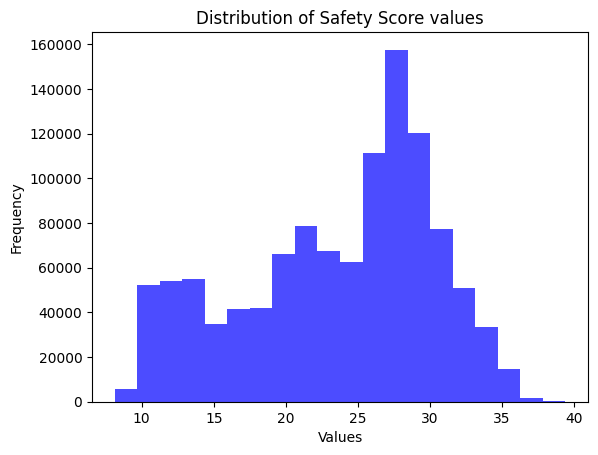

In [9]:
import matplotlib.pyplot as plt

data = df['Proxy Safety Score']

# Create a histogram
plt.hist(data, bins=20, color='blue', alpha=0.7)

# Add labels and a title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Safety Score values')

# Show the plot
plt.show()

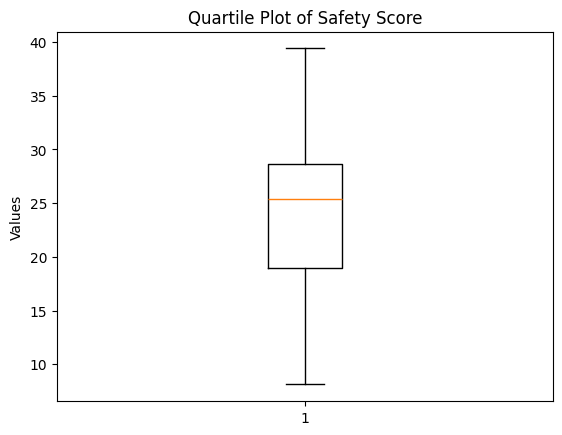

In [10]:
# Create a box plot
plt.boxplot(data)

# Add labels and a title
plt.ylabel('Values')
plt.title('Quartile Plot of Safety Score')

# Show the plot
plt.show()